In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

In [8]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [15]:
data[['YearsAtCompany', 'YearsSinceLastPromotion']]

,YearsAtCompany,YearsSinceLastPromotion
0,6,0
1,10,1
2,0,0
3,8,3
4,2,2
...,...,...
1465,5,0
1466,7,1
1467,6,0
1468,9,0


In [16]:
correlation = data['YearsAtCompany'].corr(data['YearsSinceLastPromotion'])
print(correlation)

0.6184088652176053


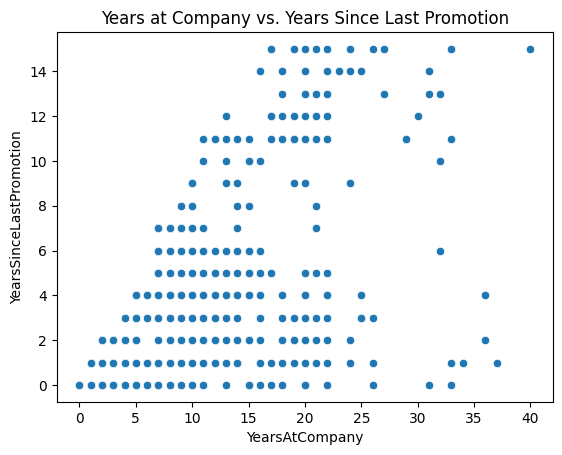

In [17]:
sns.scatterplot(x='YearsAtCompany', y='YearsSinceLastPromotion', data=data)
plt.title('Years at Company vs. Years Since Last Promotion')
plt.show()

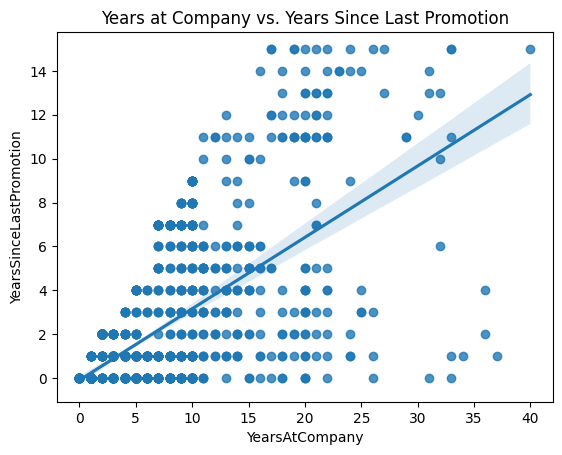

In [18]:
sns.regplot(x='YearsAtCompany', y='YearsSinceLastPromotion', data=data)
plt.title('Years at Company vs. Years Since Last Promotion')
plt.show()

In [19]:
trend_data = data.groupby('YearsAtCompany')['YearsSinceLastPromotion'].mean()

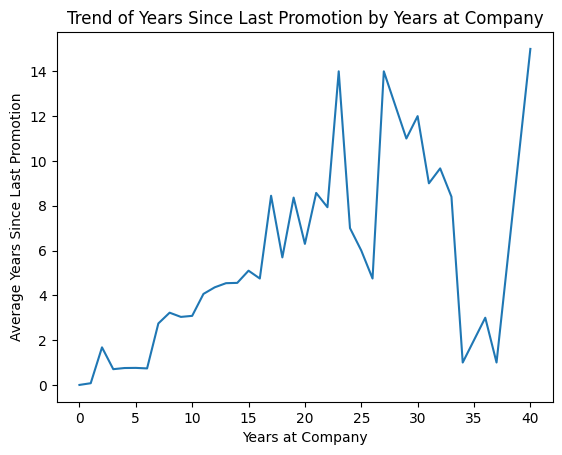

In [20]:
plt.plot(trend_data.index, trend_data.values)
plt.xlabel('Years at Company')
plt.ylabel('Average Years Since Last Promotion')
plt.title('Trend of Years Since Last Promotion by Years at Company')
plt.show()

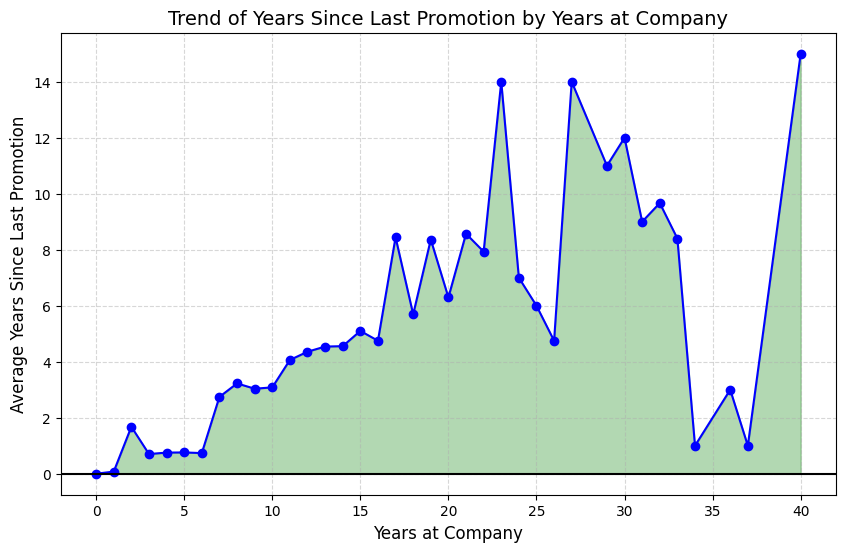

In [21]:
trend_data = data.groupby('YearsAtCompany')['YearsSinceLastPromotion'].mean()

plt.figure(figsize=(10, 6))
plt.plot(trend_data.index, trend_data.values, marker='o', linestyle='-', color='blue')

plt.fill_between(trend_data.index, trend_data.values, 0, where=(trend_data.values > 0), color='green', alpha=0.3)
plt.fill_between(trend_data.index, trend_data.values, 0, where=(trend_data.values < 0), color='red', alpha=0.3)

plt.xlabel('Years at Company', fontsize=12)
plt.ylabel('Average Years Since Last Promotion', fontsize=12)
plt.title('Trend of Years Since Last Promotion by Years at Company', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='-')

plt.show()